<h1><center> Scientific Computing Report: EMAT30008 </center></h1>
 
<h1><center> Manuel Rodriguez de Guzman Martinez  </center></h1>

This report will assess the code developed for Scientific Computing. It has three sections: Summary, Decision Making and Reflection Log. This report aims to provide a general overview into the code, improving the understanding and the build up to the final product. Also, the reflection log will provide an insight of my organisation while doing the project, including potential improvements and the outcomes for completing the course.     

To include examples of the usage of my code, I will need to import the relevant files from the folder.  

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from solode import f, exp, g, g1,  solve_ode, plot_solution, plot_error, desired_tolerance 
from shootfinal import predator_prey, pc_predator_prey, compare_b_values, numerical_shooting, plot_orbit, find_time_period
from cont import  plot_continuation_excercise_results, continuation
from pdes_all import pde_solver, visualise_solution

## 1. Summary


This section aims to describe what the code can do, any limitations to the code and the methods implemented. To help with the explanation, code will be implemented to provide examples of the usage of such, resulting in visualisations of results. Each file will be explained accordingly. 

### 1.1 ODE´s 

File 'solode.py' provides the necessary functions to assess both first order and second order ODE´s using various numerical integration techniques.It implements a wide range of methods (Euler Method, Runge- Kutta $4^{th}$, heun 3  and
Midpoint method). One must define first what ODE function one needs to analyse, in my case (f  represents $ \frac{dx}{dt} = x$  and g  represents a second order ODE, $\frac{d^2x}{dt^2} = -x $,  which can be written as a first order. When the functions are defined, solve_ode will solve it. While solving it,  the method, initial conditions and time steps can be defined to fit the solution of the ODE. Also, the function can be plotted. In the examples below, I used midpoint method but that could change. To conclude, the software solves the ODE using the specified numerical integration method. It can plot the solution of the ODEs with the option to compare the approximate solution with the true solution (if available). In my case these are exp(t) and g1.



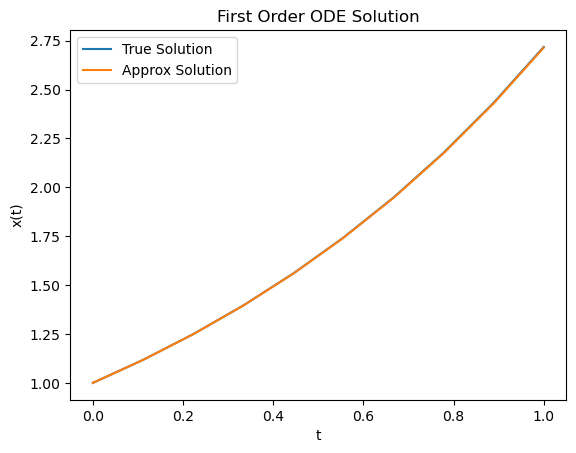

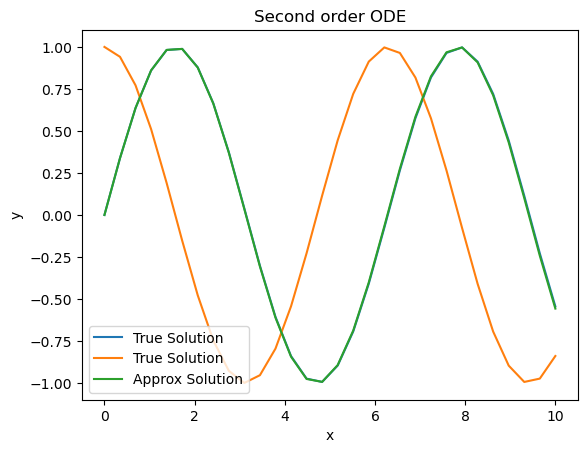

In [2]:
t = np.linspace(0,1,10) 
X0 = [1] 
X = solve_ode('midpoint', f, t, X0, dt_max=0.1)    
plot_solution(t, X, 't', 'x(t)', 'First Order ODE Solution', X_true=exp(t))
    
t = np.linspace(0,10,30)
X0 = [0,1]
X = solve_ode('midpoint', g, t, X0) 
plot_solution(t, X[:,0], 'x', 'y', 'Second order ODE', g1(t))


Although faint, one can appreciate the difference between the colours (i.e the approximated and the true solution). To compare the errors generated by the method in use, another plot is generated. This plot compares the errors of different methods for a given ODE, helping the user to analyze the performance of each method. The final implementation of the software is  that it can calculate the time step required to achieve a desired error tolerance for each method and estimate the time taken to solve the ODE with the desired tolerance.

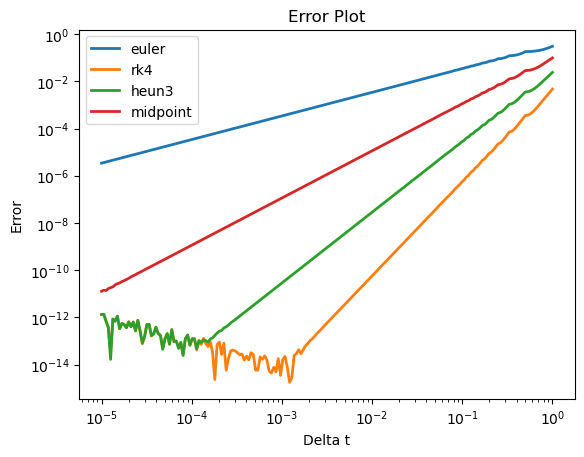


Method: euler
dt to meet desired tol: 0.0007663410868007454
Time taken to solve to desired tol: 0.0043s

Method: rk4
dt to meet desired tol: 0.5607169938205457
Time taken to solve to desired tol: 0.0000s

Method: heun3
dt to meet desired tol: 0.2354286414322417
Time taken to solve to desired tol: 0.0000s

Method: midpoint
dt to meet desired tol: 0.049370478528390015
Time taken to solve to desired tol: 0.0000s


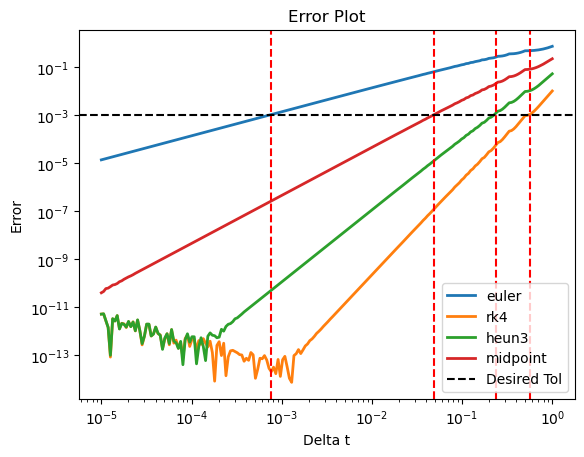

In [6]:
methods= ['euler', 'rk4', 'heun3', 'midpoint']
method_errors, hs = plot_error(methods, g, 0, 1, np.array([0,1]), np.array([np.sin(1), np.cos(1)]))
desired_tolerance(methods, f, 0, 1, [1], exp(1), 1e-3)

### 1.2 Shooting

The aim of the shooting root finding method is be able to isolate the periodic orbits of the system. The first function in the script 'shootfinal.py', predator_prey, defines the system of ODEs that describe the predator-prey equations .\begin{align}
\frac{\partial x}{\partial t} &= (1-x)x - \frac{axy}{d + x} \\ \frac{\partial y}{\partial t} &= b (1-\frac{y}{x})
\end{align} The second function, pc_predator_prey, defines a phase condition that evaluates the system at t=0 and returns the value of X at that time. This phase condition is crucial to determine an orbit to the system. 

The root_finding_problem function implements the shooting method to solve the boundary value problem, by computing the solution of the ODEs given the initial conditions and time period estimate, and then comparing the final state with the desired state via the phase condition. The numerical_shooting function uses the fsolve method to refine the initial guess of the time period and the initial conditions.

The compare_b_values function generates plots of the predator-prey relationship for different values of the b parameter, while the plot_orbit function generates plots of the solutions of the predator-prey system given an initial condition and time span. The find_time_period function calculates the time period of the periodic orbit given the system's parameters and initial conditions. Overall, the software provides a powerful set of tools for solving and visualizing ODE solutions. This could be use with other systems, having the oportunity to analyse other unknown ODE systems and explore their behaviour.


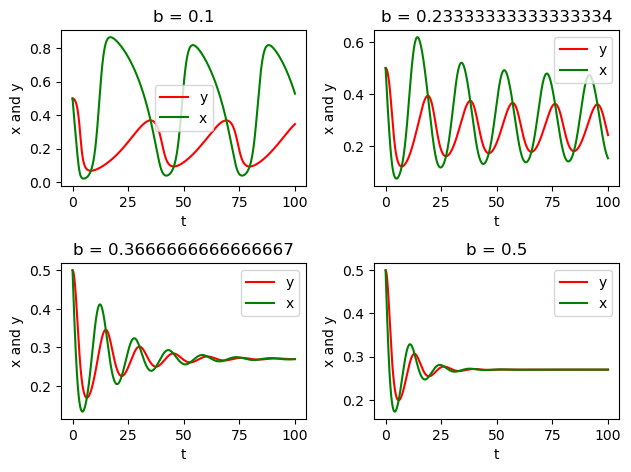

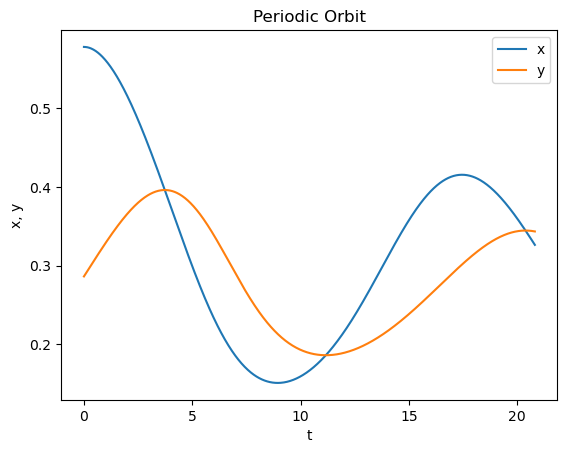

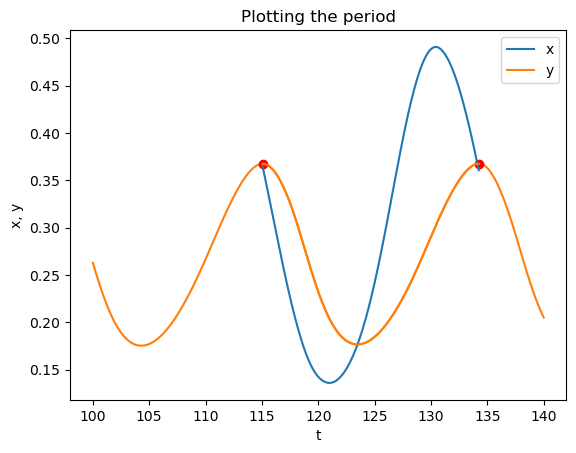

Isolating the time period of a solution to the predator-prey model

Time Period = 19.17545 (5 d.p)
X0 = [0.5778715  0.28614888]


In [7]:
compare_b_values(0.1, 0.5)
X0, T = numerical_shooting(predator_prey, pc_predator_prey, [1.3, 1.3], 10, a=1, b=0.2, d=0.1)
plot_orbit(X0, T, predator_prey, 'Periodic Orbit', a=1, b=0.3, d=0.1)
time_period = find_time_period(predator_prey, 1, 0.23, 0.1, [1, 1])
print("Isolating the time period of a solution to the predator-prey model\n")
print(f"Time Period = {time_period} (5 d.p)")
print(f"X0 = {X0}")

### 1.3 Continuation

File ´cont.py´ presents a software that focuses on solving Continuation problems for ODEs and plotting the results. Quantifying some parameter behaviour that exists in systems is done through continuation. The software can perform two types of continuation:  Natural Parameter Continuation and Pseudo-Arclength Continuation on a variety of functions, including algebraic cubic, Hopf  bifurcation normal form and modified Hopf bifurcation normal form. The equations are defined as follows:  $$x^3 -x + c = 0$$ , $$\frac{d}{dt} \begin{pmatrix} u_1 \\ u_2 \end{pmatrix} = \begin{pmatrix} \beta u_1 - u_2 - u_1(u_1^2 + u_2^2) \\ u_1 + \beta u_2 - u_2(u_1^2 + u_2^2) \end{pmatrix}$$ and  $$\frac{d}{dt} \begin{pmatrix} u_1 \\ u_2 \end{pmatrix} = \begin{pmatrix} \beta u_1 - u_2 + u_1(u_1^2 + u_2^2) - u_1(u_1^2 + u_2^2)^2 \\ u_1 + \beta u_2 + u_2(u_1^2 + u_2^2) - u_2(u_1^2 + u_2^2)^2 \end{pmatrix}$$ From the nature of the equations, one can identify that this process can be applied to system of equations or just a single equation (dependant on parameter).  The code is present in a  similar format to ODE, having the equations in the start (cubic, hopf, modified_hopf,  pc_hopf and pc_modified_hopf: these last two are representing the phase conditions for the system of equations), followed by the methods; natural_parameter: natural parameter continuation method and pseudo_arclength:  pseudo-arclength continuation method. Having stated equations and methods, a wrap funtion is introduced, in this case: continuation -  which is the main function to perform continuation. The function  calls either the natural_parameter or pseudo_arclength continuation method based on the user's choice. The shooting method from the topic before is used as a discretization technique in the natural parameter continuation and pseudo-arclength continuation methods for these systems. The phase_condition function is passed as an argument to the numerical shooting function, which calculates the error in the initial guess.The pseudo-arclength continuation method calculates the arclength using a root-finding approach. It computes the arclength by solving a constrained nonlinear system of equations, which includes the original discretized equations and an additional constraint equation that enforces the arclength condition following from the equation.





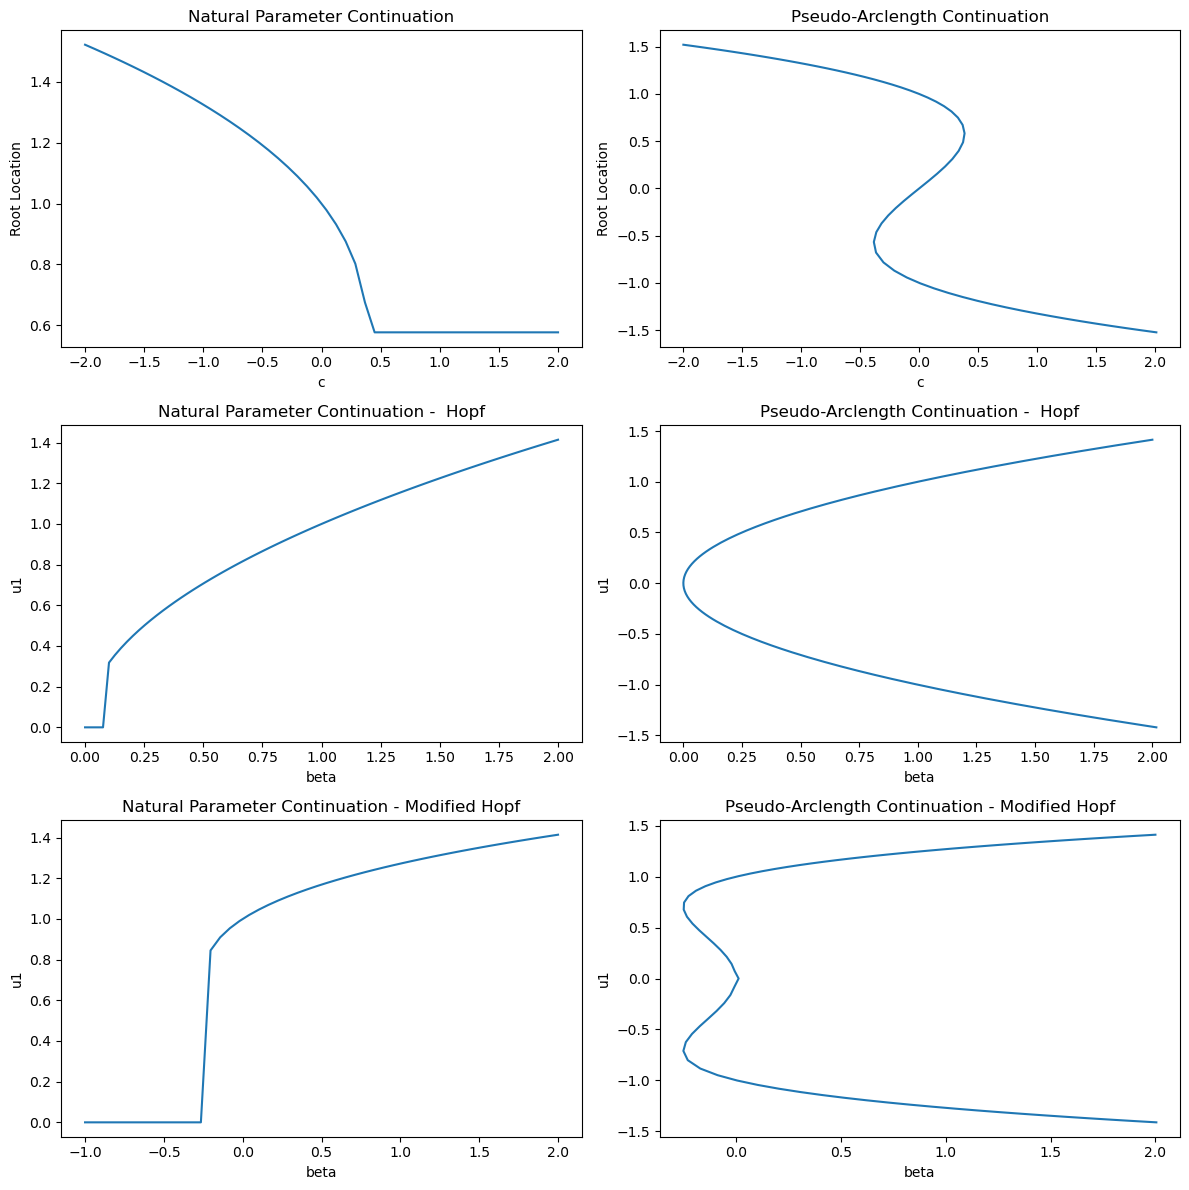

<Figure size 640x480 with 0 Axes>

In [9]:
plot_continuation_excercise_results(continuation)

### 1.4 PDE´s

This file produced  numerical methods for solving partial differential equations (PDEs) with different types of boundary conditions, including Dirichlet, Neumann, periodic, and homogeneous conditions. The methods implemented are the forward Euler method, the backward Euler method, and the Crank-Nicolson method.The pde_solver() function is the main function that calls one of the three numerical methods depending on the boundary conditions provided. It discretizes the spatial and temporal domains, initializes the solution matrix with the initial condition, and then iteratively computes the solution for each time step by using the appropriate method based on the boundary conditions. All methods are implemented in a similar manner, taking same inputs. All methods  initialises the matrix of solutions with the initial solution values, evaluates the appropriate matrix of coefficients depending on the boundary condition, and then iteratively computes the solution at each time step by matrix multiplication.The forward_euler() method computes the solution matrix by using the forward Euler time-stepping scheme.
The backward_euler() method uses the backward Euler time-stepping scheme. Backwad_euler differs in that it solves for a system of  linear equations the np.linalg.solve() method at each time step to update the solution.The crank_nicholson() method is similar to backward_euler(), but uses the Crank-Nicolson scheme instead.It then, uses a linear combination of them to update the solution at each time step.

Overall, the code provides a flexible and easy-to-use framework for solving PDEs with different types of boundary conditions using different numerical methods.

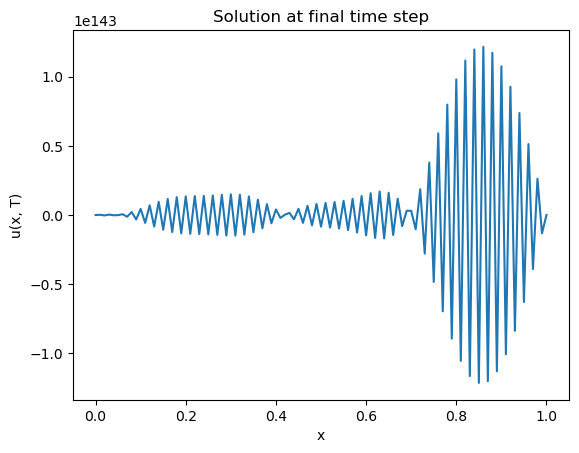

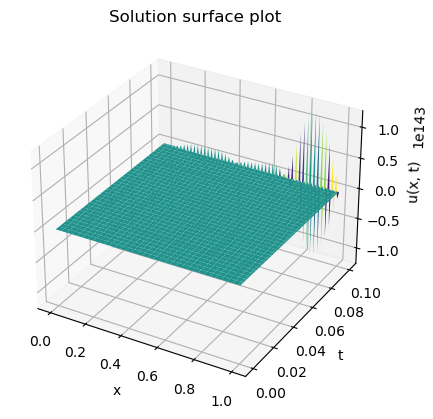

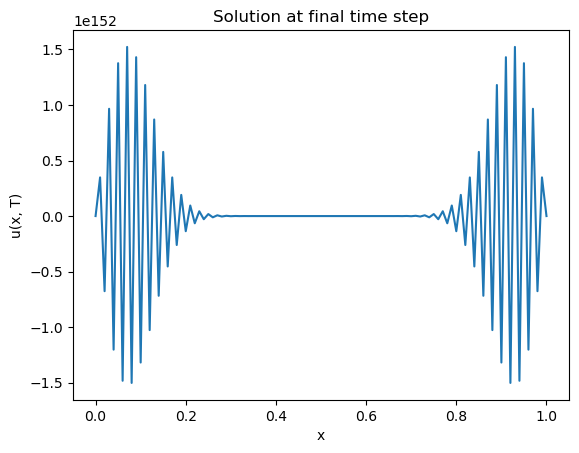

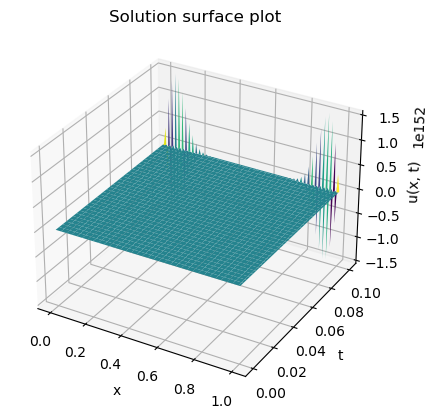

In [26]:
def initial_condition_1(x):
    return np.sin(np.pi * x)

def initial_condition_2(x):
    L = 1.0
    return x * (L - x)

def boundary_condition(t):
    return 0, 0

# Define the diffusion coefficient function
def diffusion_coefficient(x):
    return 1

# Define the right-hand side (RHS) function
def rhs_function(x, t):
    return 0
solution_matrix_1 = pde_solver(1, 0.1, 100, 100, initial_condition_1, boundary_condition, diffusion_coefficient, rhs_function)


Nx2 = 100
Nt2 = 100
L2 = 1
T2 = 0.1

solution_matrix_2 = pde_solver(L2, T2, Nx2, Nt2, initial_condition_2, boundary_condition, diffusion_coefficient, rhs_function)

## 2. Software Design Decisions


This section will look to justify the structuring of the code, as well as  its implementation and its capabilities due to the desicion selection of such. Key decisions will be analysed and explained, hopefully reaching to the explanation of the selected code structure. Also, a variety of discussion upon using other designs will be introduced. 

### 2.1 ODE´s 

The code is designed in a modular fashion, separating the implementation of each numerical method, ODE system, and plotting functions. This allows for easy addition, removal, or modification of the methods and systems without affecting other parts of the code. This also improves the readability and maintainability of the code. In solve_ode function, a dictionary to map method 
names to their respective functions, allows users to select the desired numerical integration method by providing its name as a string. This design choice simplifies the process of choosing a method and ensures that the code remains flexible and extensible.The functions for each numerical method have consistent function signatures, making it easy to switch between methods without modifying the calling code. The solve_ode function provides a single interface to solve ODEs, abstracting away the details of the chosen numerical method. The code raises a ValueError when an invalid solver method is specified, informing the user that an incorrect method was provided.Also, the code has a variable stepsize, implying that the code accounts for users´s specific maximum time step (dt_max) to control the numerical integration's resolution. This feature provides flexibility in the trade-off between accuracy and computation time.

An alternative design would have been to implement the numerical methods and ODE systems as classes, with each method and system represented by an object. This design would have allowed for greater flexibility and extensibility but would have increased the complexity of the code. The current functional approach is simpler and more accessible to users who may not be familiar to those settings. Another  alternative approach could include adaptive time-stepping methods, which automatically adjust the time step based on the local error estimate. This approach would have improved the accuracy of the solutions and reduced the required user input, but it would have increased the complexity of the code and potentially made the code slower to execute.

Overall, the code's current structure and design decisions was set to strike a balance between simplicity, extensibility, and performance, providing a flexible and easy-to-use tool for solving ODEs using various numerical integration methods.

ODE Workflow: 
1. Define ODE systems
   * f(x, t, args)
   * g(X, t, args)
   
2. Define numerical methods
   * euler_step(f, x, t, dt, **params)
   * RK4_step(f, x, t, dt, **params)
   * simpson38_step(f, x, t, dt, **params)
   * midpoint_step(f, x, t, dt, **params)

3. Define ODE solving functions
   * solve_to(f, method, t0, t1, X0, **params)
   * solve_ode(method, f, t, X0, use_method_dict=True, **params)

4. Define plotting functions
   * plot_solution(t, X, xlabel, ylabel, title, X_true=None)
   * plot_error(methods, f, t0, t1, X0, X1_true, show_plot=True, **params)
   * desired_tolerance(methods, f, t0, t1, X0, X_true, desired_tol, **params)

5. Main function
   * main()

The solve_ode function first maps the method names to their respective functions using either a dictionary (if use_method_dict is True) or a series of if-else statements. Then, it initializes an array X to store the solutions at each time point in t. The first row of this array is set to the initial condition X0. The function then iterates through the time points and calls the solve_to function with the appropriate numerical method function and the given time points.

The diagram shows the five main sections of the code, representing the ODE systems, numerical methods, ODE solving functions, plotting functions, and the main function that ties everything together.  The code starts with defining the ODE systems and numerical methods, which are then used in the ODE solving functions. The plotting functions are used to visualize the results, and the main function orchestrates the entire process, utilizing the other functions to solve the given ODEs and present the results.

The solve_to function first attempts to extract the dt_max parameter from the params dictionary. If it is not provided, a default value of 0.1 is used. The function then enters a loop where it repeatedly calls the specified numerical method function with the current time point and state, updating the state after each call. The loop continues until the current time reaches or exceeds the final time point t1. The final state is then returned.

Together, the solve_ode and solve_to functions provide a flexible and modular way to solve ODEs using different numerical methods. By changing the method name and function provided, one can easily switch between different numerical methods for solving a given ODE. The structure of these functions also allows for easy extensibility, as new numerical methods can be added without modifying the core solving logic.

### 2.2 Shooting

In this section, it is discussed the key software design decisions made while developing the predator-prey model code. These decisions are crucial for creating a well-structured, efficient, and maintainable program.

The code is organized into a modular structure, extremely similar to the previous,  with clearly defined functions, each responsible for a specific task. This design choice promotes readability, maintainability, and extensibility. Key functions include:

predator_prey: Defines the predator-prey ODE system.
pc_predator_prey: Defines the phase condition for the predator-prey system.
root_finding_problem: Sets up the root-finding problem for the numerical shooting method.
numerical_shooting: Implements the numerical shooting method to find periodic orbits.
compare_b_values: Compares the system's behavior for different values of parameter b.
plot_orbit: Plots the periodic orbit found using the numerical shooting method.
find_time_period: Computes and plots the time period of a solution for given initial conditions and parameters.
main: Orchestrates the execution of the program and calls the necessary functions to solve and visualize the predator-prey system.

The solver for the ODE system is implemented using the fourth-order Runge-Kutta (RK4) method through the solve_ode function. This is not a coincidence, it is because this method was chosen for its balance between accuracy, stability, and computational cost. The solver is designed to handle arbitrary ODE systems, making it reusable and extensible for other problems. To find periodic solutions, one employs the numerical shooting method, which involves guessing the initial conditions and period of the solution, then adjusting them iteratively until the desired accuracy is achieved. This method allows us to find the periodic orbit of the predator-prey system efficiently. To find the periodic orbit using the numerical shooting method, a root-finding problem is set up with the root_finding_problem function. This function is designed to be flexible, allowing it to handle different ODE systems and phase conditions by passing the corresponding functions as arguments. The fsolve function from the scipy.optimize library is used to solve the root-finding problem, providing a robust and efficient solution. 

The visualization functions (compare_b_values, plot_orbit, and find_time_period) are designed to provide insights into the predator-prey system's behavior. These functions use the matplotlib.pyplot library for creating the plots, ensuring compatibility and ease of use. Each function is designed to be reusable and extensible, allowing them to be adapted for other ODE systems. 

An alternative design approach would have been to implement the predator-prey model using an object-oriented design. This approach could have involved creating classes for the ODE system, the solver, and the visualization tools. While this approach can offer advantages in terms of encapsulation and code organization, the chosen functional design provides simplicity and ease of understanding for the given problem. Other techniques for finding periodic orbits could have been employed, such as  continuation methods. However, the numerical shooting method was chosen for its simplicity and effectiveness in this specific problem.

In conclusion, the key software design decisions made for the predator-prey model code promote readability, maintainability, and extensibility. The chosen methods and modular structure enable efficient analysis and visualization of the system's behavior, allowing users to gain insights

### 2.3 Continuation

I implemented a script for performing numerical continuation, a technique for finding a set of solutions to a given problem as a function of one or more parameters. Specifically, it is implemented natural parameter continuation and pseudo-arclength continuation methods for three different problems: a cubic equation, the Hopf bifurcation, and a modified Hopf bifurcation. The code is divided into several sections: equation definitions, helper functions, the main continuation function, plotting functions, and an example driver script. The code is designed to be modular, with each problem's equation, discretization method, and continuation method separated into different functions. This allows for the easy addition of new problems, discretization methods, and continuation methods without affecting the existing code. The code is designed to be flexible, as implied above, with the ability to handle different problems and their corresponding equations, discretization methods, and continuation methods. Users can choose between natural parameter continuation and pseudo-arclength continuation methods for the given problem by modifying the method parameter.

Solver implementation: The solvers for the three problems are implemented as separate functions, taking parameters and initial conditions as input arguments. This allows users to be in control, having the capacity to  understand and modify the solver functions if needed. The continuation methods are designed to be robust, with error handling and convergence checks implemented in the numerical_shooting and root_finding_problem functions. This ensures that the code is less likely to fail or produce incorrect results due to convergence issues.

The solvers for the three problems could have been implemented using existing solver libraries, such as SciPy's fsolve or odeint functions. However, this would have reduced the flexibility and customizability of the code, as users would be limited by the capabilities of the external solver libraries. As a result, those solvers were not used. 

The code is organized in a way that separates the concerns of equation definition, solver implementation, continuation methods, and plotting. This makes the code more maintainable and easier to understand. Each section is responsible for a specific aspect of the problem, which enables users to make changes to a particular section without affecting the others. Also, the use of ** params to pass additional parameters to functions allows  a more flexible and extensible approach to parameter handling, making it easier to add or modify parameters in the future without changing the function signatures. Also, the code incorporates error handling in the numerical_shooting and root_finding_problem functions, ensuring that the code is robust. This is important because numerical solvers can sometimes fail to converge, and proper error handling ensures that the code can handle with it well.  The code includes a function (plot_continuation_excercise_results) for visualizing the results of the continuation methods. This allows users to easily understand the results of the computations and compare the performance of different continuation methods for the given problems.

Flow of script is: 
Equation definitions (cubic, hopf, modified_hopf)
Helper functions (natural_parameter, pseudo_arclength, continuation, plot_continuation_excercise_results)
Main function (main)

In conclusion, the key design decisions in your code reflect a balance between flexibility, modularity, and robustness. The separation of concerns, use of higher-order functions, and error handling ensure that the code is maintainable, extensible, and reliable. The flow of the code provides a clear understanding of the different components and their interactions.

### 2.4 PDE´s 

Each numerical method (Forward Euler, Backward Euler, and Crank-Nicolson) is implemented as a separate function, making the code easier to understand, maintain, and extend. The code supports different types of boundary conditions, including Dirichlet, Neumann, Periodic, and Homogeneous. This allows users to solve a wide range of problems without having to modify the core code.
The code makes use of NumPy's efficient linear algebra operations and SciPy's sparse linear algebra functions to handle large matrices, ensuring that the performance of the code is optimized for large-scale problems. The code focuses on the core functionality required to solve the 1D diffusion equation, avoiding unnecessary complexity. Implementing more sophisticated spatial discretization schemes, such as the finite element method or spectral methods. These methods can provide improved accuracy but come at the cost of increased complexity and computational requirements. To improve the model, one could implement more advanced numerical methods, such as Alternating Direction Implicit (ADI) or higher-order finite difference schemes, to provide users with a wider range of options for solving PDEs.

## 3. Reflective Learning Log

### 3.1 What did I learn about the mathematical algorithms?


Throughout the project, I learned various mathematical algorithms and techniques to solve a variety of questions(involving 2 main groups, ODE´s and PDE´s) : 
- Starting of from ODE´s, I revisited the methods to solve Initial Value Problems which was essential into  securing the basic knowledge before developping new concepts. In addition, I understood the effect of different timesteps to determine the error in solutions. 
- Following on, I develop the method to solve  Boundary Value Problems for ODE´s, for unknown equations using shooting technique: Transforming BVPs into IVPs, allowing for easier numerical solution.
- Continuing with Boundary Value Problems, the method of continuation was introduced. Developing the knowledge to solve ODE´s using continuation gave me an insight on the behavior of such equations, being able to analyse them and tracking its solution while varying parametres.  
- Natural parameter continuation and psuedo arclength were also new techniques new to me. 
- I  learned how the algorithms could flow from one another, which was quite surprising but engaging at the same time. 
- I  learned about bifurcations, again this topic was completely new to me
- Expanded and explored my knowledge on PDEs. I learned finite difference methods, which are used to approximate derivatives in PDEs with discrete values. These techniques enabled me to solve PDEs numerically and analyze their behavior under various conditions. Also explored the method of lines, explicit Euler and dealing with nonlinear PDEs (sparse lnear algebra).
By studying these mathematical algorithms and techniques, I developed a strong foundation in solving ODEs and PDEs, enabling me to be confident when comming across them. 


### 3.2 What did I learn about software engineering? How have I progressed in my abilities?

                                                                                                                           

Although I was not very familiar with github at the start of the course, working independantly from it because it was something new that I did not like at the start, I ended up using it a lot, relying on it and I finally understood the importance and easy use it has. Also, it is not software engineering related but, I came to realisation about the importance in code testing. While it is not an algorithm itself, its an incredible tool to verify the correctness and reliability of implementations. Also, the importance of having a clear, easy flowing structure I believe is one of the keys to save so much time and energy. 
With regard to progression of my abilities, I expanded a great deal in my python capability.Discovering *params syntax and developing new techniques in python has leaded into my knowledge expansion.  Also, I believe I have improved also a lot is in the use of Github, which I was unfamiliar with. I can firmly say by the end of the unit I am extremely confident using githuband its commands which, without a doubt will be extremely important in the future.  


### 3.3 What are the short-term implications of what I've learnt?  
         

To generalise, I believe the short term effects of my learning will relly within summer exams. Having Continuum mathematics exam is  the knowledge learned in this  module helps me directly with that exam, being more confident around certain scenarious.Also, the coding implications are vast. From git control, to modular scripts and software engineering.

### 3.4 What are the long-term implications of what I've learnt? 
   

I believe the long- term implications of the learning outcome is more based on the computer aspect than on mathematical aspects. Understanding the importance of testing, making clear readible, comprehendable and user friedly code I believe will help me the most in the long run. Furthermore, the python knowledge adquired and the lesson learnt that organisation is crucial to develop code are key takeaways from the module.

### 3.5 What would I have done differently if I started the unit over again?
   

I have learnt the importance to fully understand the concepts first and then apply them than just getting on appplying them. It is so much more time efficient if you earn and then apply. Hence, I would study the theory in a deeper level first, keeping up to date with the weeks. Also, I would  started commiting into github as soon as I did the first week. Knowing how it functions now, I can now state that but before it was unkown to me.  

### 3.6 What will I do differently in the future?

In future, I will keep a contant log of the progress I have been making, updating regularly and commiting to github when changes are made. Also, I would plan ahead, following strict rules if past deadlines set by me of the work I want to do by when. 